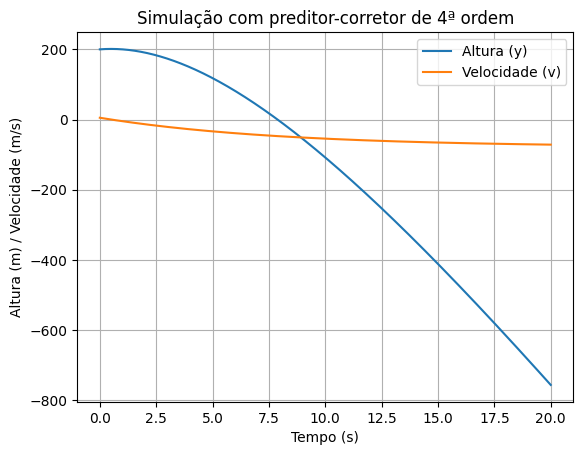

Altura Máxima: 201.22m
Tempo até Altura Máxima: 0.49s
Tempo Até Queda: 20.0s
Velocidade de Impacto: -71.63m/s


In [6]:
import numpy as np
import matplotlib.pyplot as plt
# Implementando o método de Runge-Kutta de quarta ordem para a inicialização e o método preditor-corretor de quarta ordem.

# Definindo os parâmetros
g = 9.81      # Aceleração gravitacional (m/s^2)
k = 0.25      # Coeficiente de resistência do ar (kg/s)
m = 2.0       # Massa do objeto (kg)
v0 = 5.0      # Velocidade inicial (m/s)
y0 = 200.0    # Altura inicial (m)
t0 = 0.0      # Tempo inicial (s)
tf = 20.0     # Tempo final (s) para simulação completa

# Funções que representam as EDOs do problema
def dvdt(v):
    return -g - (k/m) * v

def dydt(v):
    return v

# Função de Runge-Kutta de quarta ordem (inicialização)
def runge_kutta_4th_order(v0, y0, t0, tf, dt):
    t_values = [t0]
    v_values = [v0]
    y_values = [y0]

    t = t0
    v = v0
    y = y0

    while t < tf and y > 0:
        # RK4 steps
        F1v = dvdt(v)
        F1y = dydt(v)

        v_half = v + 0.5 * dt * F1v
        y_half = y + 0.5 * dt * F1y
        F2v = dvdt(v_half)
        F2y = dydt(v_half)

        v_half = v + 0.5 * dt * F2v
        y_half = y + 0.5 * dt * F2y
        F3v = dvdt(v_half)
        F3y = dydt(v_half)

        v_next = v + dt * F3v
        y_next = y + dt * F3y
        F4v = dvdt(v_next)
        F4y = dydt(v_next)

        v = v + (dt / 6) * (F1v + 2 * F2v + 2 * F3v + F4v)
        y = y + (dt / 6) * (F1y + 2 * F2y + 2 * F3y + F4y)

        t += dt
        t_values.append(t)
        v_values.append(v)
        y_values.append(y)

    return np.array(t_values), np.array(v_values), np.array(y_values)

# Método preditor-corretor de quarta ordem
def predictor_corrector_4th_order(v0, y0, t0, tf, dt):
    # Inicializar os três primeiros estados com Runge-Kutta de quarta ordem
    t_vals, v_vals, y_vals = runge_kutta_4th_order(v0, y0, t0, 3*dt, dt)

    t = t_vals[-1]
    v = v_vals[-1]
    y = y_vals[-1]

    while t < tf and y > 0:
        # Predição: Adams-Bashforth de quarta ordem
        F0 = dvdt(v_vals[-1])
        F1 = dvdt(v_vals[-2])
        F2 = dvdt(v_vals[-3])
        F3 = dvdt(v_vals[-4])

        v_pred = v_vals[-1] + dt / 24 * (55 * F0 - 59 * F1 + 37 * F2 - 9 * F3)
        y_pred = y_vals[-1] + dt / 24 * (55 * dydt(v_vals[-1]) - 59 * dydt(v_vals[-2]) + 37 * dydt(v_vals[-3]) - 9 * dydt(v_vals[-4]))

        # Correção: Adams-Moulton de quarta ordem
        F_pred = dvdt(v_pred)

        v_next = v_vals[-1] + dt / 24 * (9 * F_pred + 19 * F0 - 5 * F1 + F2)
        y_next = y_vals[-1] + dt / 24 * (9 * dydt(v_pred) + 19 * dydt(v_vals[-1]) - 5 * dydt(v_vals[-2]) + dydt(v_vals[-3]))

        # Atualizar valores
        t += dt
        t_vals = np.append(t_vals, t)
        v_vals = np.append(v_vals, v_next)
        y_vals = np.append(y_vals, y_next)

    return t_vals, v_vals, y_vals



# Rodando a simulação com o método preditor-corretor de quarta ordem
t_pc, v_pc, y_pc = predictor_corrector_4th_order(v0, y0, t0, tf, 0.01)

# Plotando a solução aproximada
plt.plot(t_pc, y_pc, label='Altura (y)')
plt.plot(t_pc, v_pc, label='Velocidade (v)')
plt.xlabel('Tempo (s)')
plt.ylabel('Altura (m) / Velocidade (m/s)')
plt.title('Simulação com preditor-corretor de 4ª ordem')
plt.legend()
plt.grid(True)
plt.show()

# Resultados principais: t_total, ymax, tmax, v_impacto
y_max_pc = np.max(y_pc)
t_max_pc = t_pc[np.argmax(y_pc)]
t_total_pc = t_pc[-1]
v_impacto_pc = v_pc[-1]

#(t_max_pc, y_max_pc, t_total_pc, v_impacto_pc)

print(f"Altura Máxima: {np.round(y_max_pc, 2)}m\nTempo até Altura Máxima: {np.round(t_max_pc, 2)}s\nTempo Até Queda: {np.round(t_total_pc, 2)}s\nVelocidade de Impacto: {np.round(v_impacto_pc, 2)}m/s")